In [5]:
import requests
from lxml import etree

In [2]:
url = 'https://sh.fang.lianjia.com/loupan'
head = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.4 Safari/605.1.15'}
res = requests.get(url,headers=head)
res.request.headers

{'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.4 Safari/605.1.15', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

'<!DOCTYPE html><html lang="zh-CN"><head><meta http-equiv="Content-Type" content="text/html; charset=utf-8"><meta http-equiv="X-UA-Compatible" content="IE=edge" /><meta name="renderer" content="webkit" /><meta http-equiv="Cache-Control" content="no-transform" /><meta http-equiv="Cache-Control" content="no-siteapp" /><meta name="format-detection" content="telephone=no" />\n    <title>上海楼盘|新开盘楼盘|房价信息_上海楼盘(上海链家新房)</title>\n    <meta name="description" content="上海链家新房频道,为你提供大量真实优质的上海新开盘楼盘、新房房价等信息快速查询,创造最佳新房购房体验." />\n    <meta name="keywords" content="上海楼盘,上海房价" />\n<link href="/favicon.ico" type="image/x-icon" rel=icon><link href="/favicon.ico" type="image/x-icon" rel="shortcut icon"><link rel="stylesheet" href="//s1.ljcdn.com/phoenix/static/dist/common/site.css?_v=20220315113050"><link rel="alternate" media="only screen and (max-width: 640px)" href="https://m.lianjia.com/sh/loupan/" >\n    <link rel="stylesheet" href="//s1.ljcdn.com/phoenix/static/dist/pages/list/index.css?_v=20220315113
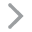

In [4]:
res.text

In [9]:
dom = etree.HTML(res.text)

In [13]:
loupan = dom.xpath('//div[@class="resblock-name"]/a/text()')
loupan

['象屿和悦新宸',
 '世纪金源梧桐印象',
 '悦湖里',
 '杭州湾融创文旅城',
 '华发招商依云四季',
 '绿城乌镇雅园',
 '中建玖海云天',
 '御府景苑',
 '奥园印象高迪',
 '中海阅麓山']

In [16]:
dom.xpath('//div[@class="resblock-location"]/span[1]/text()')

['上海周边', '金山', '上海周边', '上海周边', '金山', '上海周边', '浦东', '上海周边', '上海周边', '松江']

In [22]:
area = dom.xpath('//div[@class="resblock-area"]/span')
price = dom.xpath('//div[@class="main-price"]/span[@class="number"]/text()')
area = [i.text for i in area]
area,price

(['建面 76-119㎡',
  '建面 78-100㎡',
  '建面 70-95㎡',
  '建面 70-145㎡',
  '建面 78-125㎡',
  '建面 77-147㎡',
  '建面 93-143㎡',
  '建面 87-128㎡',
  None,
  '建面 90-143㎡'],
 ['16500',
  '21883',
  '15000',
  '13500',
  '21000',
  '24000',
  '34000',
  '8000',
  '10650',
  '53000'])

In [1]:
import requests
import time
import random
from lxml import etree
head = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.4 Safari/605.1.15'}
mc = []
dz = []
mj = []
jg = []
for i in range(1,2):
    print(f'正在爬取第{i}页')
    url = f'https://sh.fang.lianjia.com/loupan/pg{i}/'
    res = requests.get(url,headers=head)
    dom = etree.HTML(res.text)
    loupan = dom.xpath('//div[@class="resblock-name"]/a/text()')
    location = dom.xpath('//div[@class="resblock-location"]/span[1]/text()')
    area = dom.xpath('//div[@class="resblock-area"]/span')
    price = dom.xpath('//div[@class="main-price"]/span[@class="number"]/text()')
    print(type(area[0]))
    area = [i.text for i in area]
    mc.extend(loupan)
    dz.extend(location)
    mj.extend(area)
    jg.extend(price)
    time.sleep(random.randint(20,30))

正在爬取第1页
<class 'lxml.etree._Element'>


In [ ]:
mc,dz,mj,jg

In [3]:
len(mc),len(dz),len(mj),len(jg)

(100, 100, 100, 100)

In [5]:
import pandas as pd
dic = {
    '楼盘名称':mc,
    '位置':dz,
    '面积':mj,
    '价格':jg
}
df = pd.DataFrame(dic)
df

,楼盘名称,位置,面积,价格
0,象屿和悦新宸,上海周边,建面 76-119㎡,16500
1,世纪金源梧桐印象,金山,建面 78-100㎡,21883
2,悦湖里,上海周边,建面 70-95㎡,15000
3,杭州湾融创文旅城,上海周边,建面 70-145㎡,13500
4,云湖壹号,金山,建面 76-151㎡,21074
...,...,...,...,...
95,源昌幸福金街,青浦,None,45000
96,金山万达海汇街,金山,None,25000
97,中国铁建青秀城,宝山,None,38000
98,禹洲城市广场,浦东,None,21000


In [6]:
df.to_csv('/Users/hukeer/Desktop/上海楼房.csv',encoding='utf-8')